<a href="https://colab.research.google.com/github/chinhtruk/Group2/blob/main/2174802010219_Nguye%CC%82%CC%83n_Chi%CC%81nh_Tru%CC%9B%CC%A3c_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LAB 4: MỘT SỐ THUẬT TOÁN CƠ BẢN CỦA HỌC MÁY

1. Linear regression

In [ ]:
## bài 1: sử dụng hồi quy tuyến tính để dự đoán giá nhà thông qua bộ dữ liệu fetch-califonia

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
cali = fetch_california_housing()
X = pd.DataFrame(cali.data, columns=cali.feature_names)
y = pd.Series(cali.target)

In [3]:
## chia tập dữ liệu có 80% huấn luyện và 20% kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
## xây dựng và huấn luyện mô hình
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [6]:
## dự đoán và đánh giá
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)

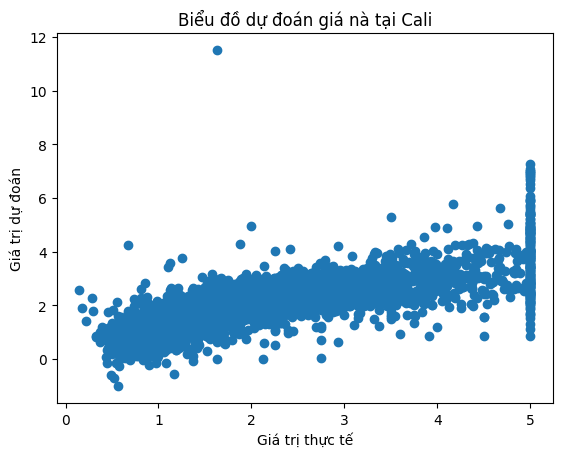

In [7]:
## Vẽ biểu đồ
plt.scatter(y_test, y_pred)
plt.xlabel('Giá trị thực tế')
plt.ylabel('Giá trị dự đoán')
plt.title('Biểu đồ dự đoán giá nà tại Cali')
plt.show()

2. Test zalo

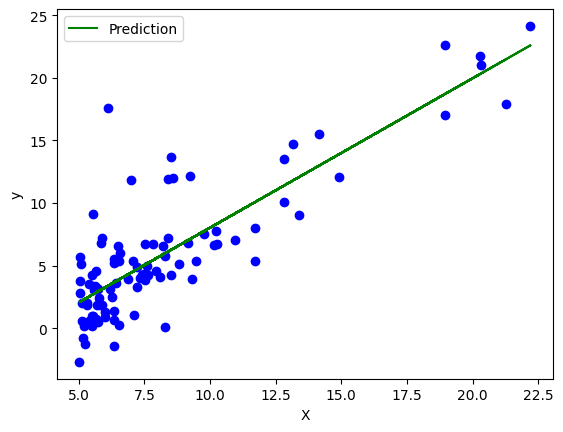

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Bước 1: Đọc dữ liệu từ file
file_path = '/content/lab1data1.txt'
df = pd.read_csv(file_path, names=['X', 'y'])

# Bước 2: Chia dữ liệu thành X và y
X = df[['X']]
y = df['y']

# Bước 3: Huấn luyện mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X, y)

# Bước 4: Dự đoán giá trị
y_pred = model.predict(X)

# Vẽ biểu đồ trực quan hóa kết quả
plt.scatter(X, y, color='blue')  # Dữ liệu thực tế
plt.plot(X, y_pred, color='green', label='Prediction')  # Đường hồi quy
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

Bài 3

In [ ]:
# Hồi quy logistic
# Phân loại nhị phân hoặc đa lớp dựa trên các đặc trưng

In [32]:
#Xây dựng mô hình LG để phân loại nhị phân trong dữ liệu breast cancer
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [19]:
#load data
data = load_breast_cancer()
X = data.data
y = data.target

In [20]:
# Chia tập dữ liệu thành tập huấn luyện (75%) và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [21]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
# Xây dựng và huấn luyện mô hình Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [23]:
# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

In [24]:
# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

Accuracy: 0.9860
Confusion Matrix:
 [[52  1]
 [ 1 89]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        53
           1       0.99      0.99      0.99        90

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



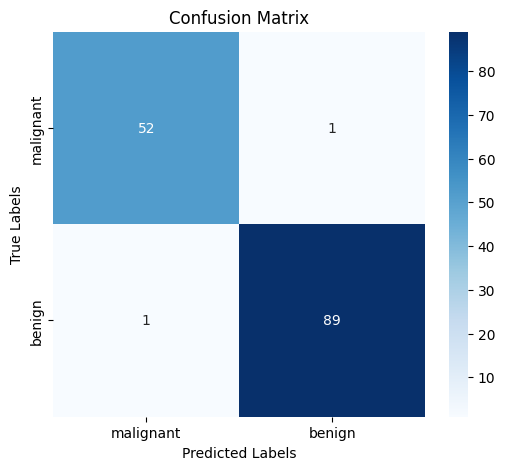

In [30]:
# Vẽ biểu đồ ma trận nhầm lẫn
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [35]:
# Trực quan hóa một số đặc trưng quan trọng